In [63]:
import datetime
from itertools import combinations
from typing import NamedTuple
from matplotlib import pyplot as plot
from git import Repo
import networkx as nx
from pprint import pprint


In [64]:
repo = Repo("../quizzology")

In [65]:
little_labels = dict(with_labels=True, font_size=7)
medium_labels = dict(with_labels=True, font_size=7)

In [66]:
repo_graph = nx.Graph()
for commit in repo.iter_commits():
    for (left,right) in combinations(commit.stats.files,2):
        if (left,right) in repo_graph.edges:
            data = repo_graph.get_edge_data(left,right)
            data['count'] = data.get('count',1) + 1
        else:
            repo_graph.add_edge(left,right)


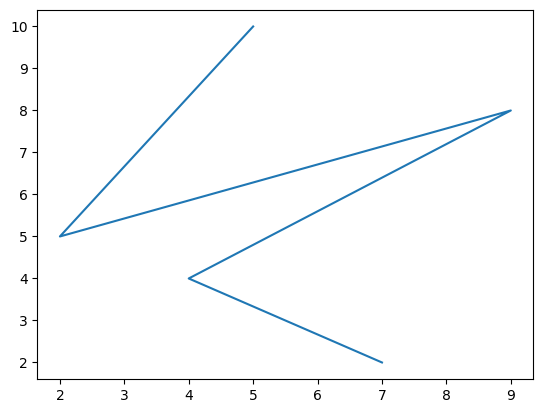

In [67]:
# Create a plot 

x = [5, 2, 9, 4, 7]
y = [10, 5, 8, 4, 2]
plot.plot(x, y)
plot.show()

In [68]:
# Draw a network plot of some kind

# graph = nx.petersen_graph() # well known sample data 
# subax = plot.subplot(121)
# nx.draw(graph)

# repo_plot = plot.subplot(122)
# nx.draw(repo_graph, with_labels=True)



In [69]:

pprint(list(nx.connected_components(repo_graph)))


[{'.dockerignore',
  '.github/workflows/quizzology-ci.yml',
  '.gitignore',
  '.pylintrc',
  'Dockerfile',
  'README.md',
  'TestDockerfile',
  'apps/__init__.py',
  'apps/author.py',
  'apps/author/__init__.py',
  'apps/author/author.py',
  'apps/author/author_controller.py',
  'apps/author/tests/__init__.py',
  'apps/author/tests/test_authorcontroller.py',
  'apps/author/tests/test_controller.py',
  'apps/author/tests/test_quiz_authoring_form.py',
  'apps/author/tests/test_quiz_schema.py',
  'apps/author/views/quiz_author_home.tpl',
  'apps/author/views/quiz_authoring_form.tpl',
  'apps/authoring/__init__.py',
  'apps/authoring/author.py',
  'apps/authoring/views/quiz_authoring_form.tpl',
  'apps/study.py',
  'apps/study/__init__.py',
  'apps/study/session_store.py',
  'apps/study/session_store_mongodb.py',
  'apps/study/session_store_tinydb.py',
  'apps/study/study.py',
  'apps/study/studycontroller.py',
  'apps/study/tests/__init__.py',
  'apps/study/tests/test_quiz_question.py',
 

In [76]:
help(nx.draw)


Help on function draw in module networkx.drawing.nx_pylab:

draw(G, pos=None, ax=None, **kwds)
    Draw the graph G with Matplotlib.
    
    Draw the graph as a simple representation with no node
    labels or edge labels and using the full Matplotlib figure area
    and no axis labels by default.  See draw_networkx() for more
    full-featured drawing that allows title, axis labels etc.
    
    Parameters
    ----------
    G : graph
        A networkx graph
    
    pos : dictionary, optional
        A dictionary with nodes as keys and positions as values.
        If not specified a spring layout positioning will be computed.
        See :py:mod:`networkx.drawing.layout` for functions that
        compute node positions.
    
    ax : Matplotlib Axes object, optional
        Draw the graph in specified Matplotlib axes.
    
    kwds : optional keywords
        See networkx.draw_networkx() for a description of optional keywords.
    
    Examples
    --------
    >>> G = nx.dodecahe

with_labels font_size


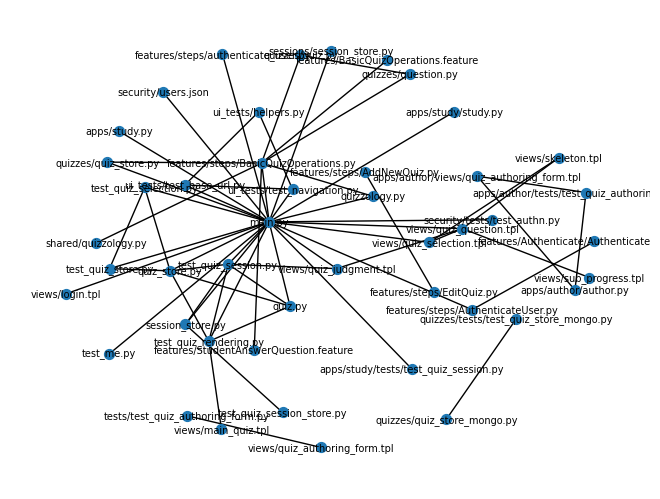

In [73]:
# Perhaps we should trim the data set so that we don't plot every single 
# edge and node in one ugly graph.

busiest_graph = nx.Graph()
busiest_graph.add_edges_from(edge 
                             for edge in repo_graph.edges 
                             if repo_graph.get_edge_data(*edge).get('count',0) > 5)
from networkx import spring_layout 
layout= spring_layout(busiest_graph, k=0.8, iterations=50)
nx.draw(busiest_graph, layout, **little_labels, node_size=50)


    
    

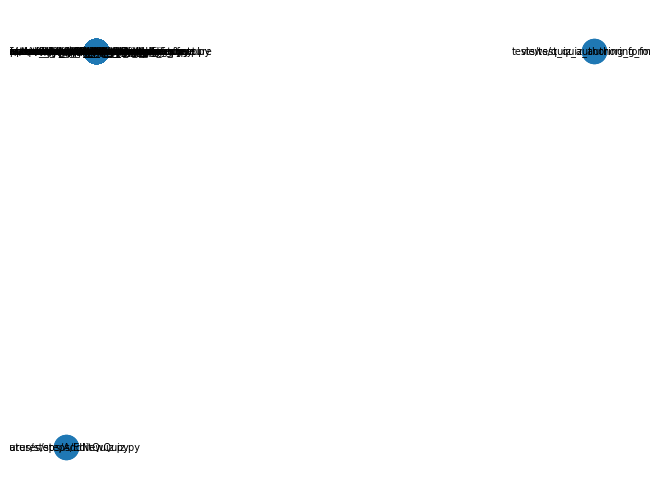

In [75]:
# Not my best choice here.
nx.draw_spectral(busiest_graph, **little_labels)


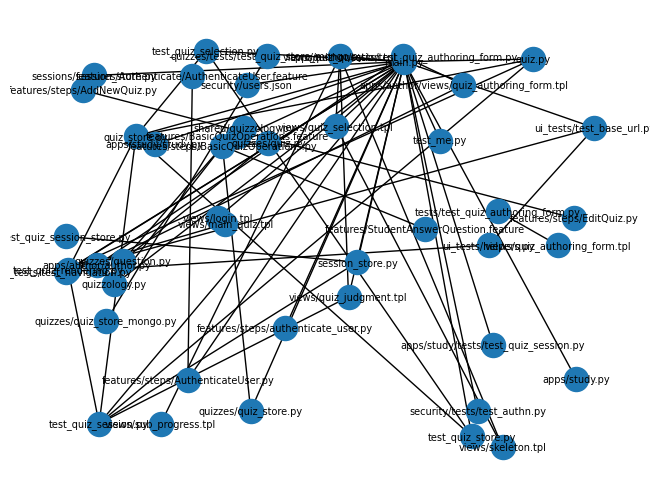

In [74]:
nx.draw_random(busiest_graph, **little_labels)


In [ ]:
print(list(nx.connected_components(repo_graph))[-1])

Interesting ideas
* Average commit size
* Tests included in commits?
* Connected groups
* Most edited files
* Commit frequency
* Defects vs Features vs Refactors vs Other (conventional commits?)
* Ticket numbers and clustering of same

In [ ]:
# Average commit size
repo = Repo('../quizzology')
commits = [(commit.author.name, commit.authored_datetime, len(commit.stats.files))
           for commit 
           in repo.iter_commits()
          ]
pprint(commits[:3])

In [ ]:
# How to break into separate components? 

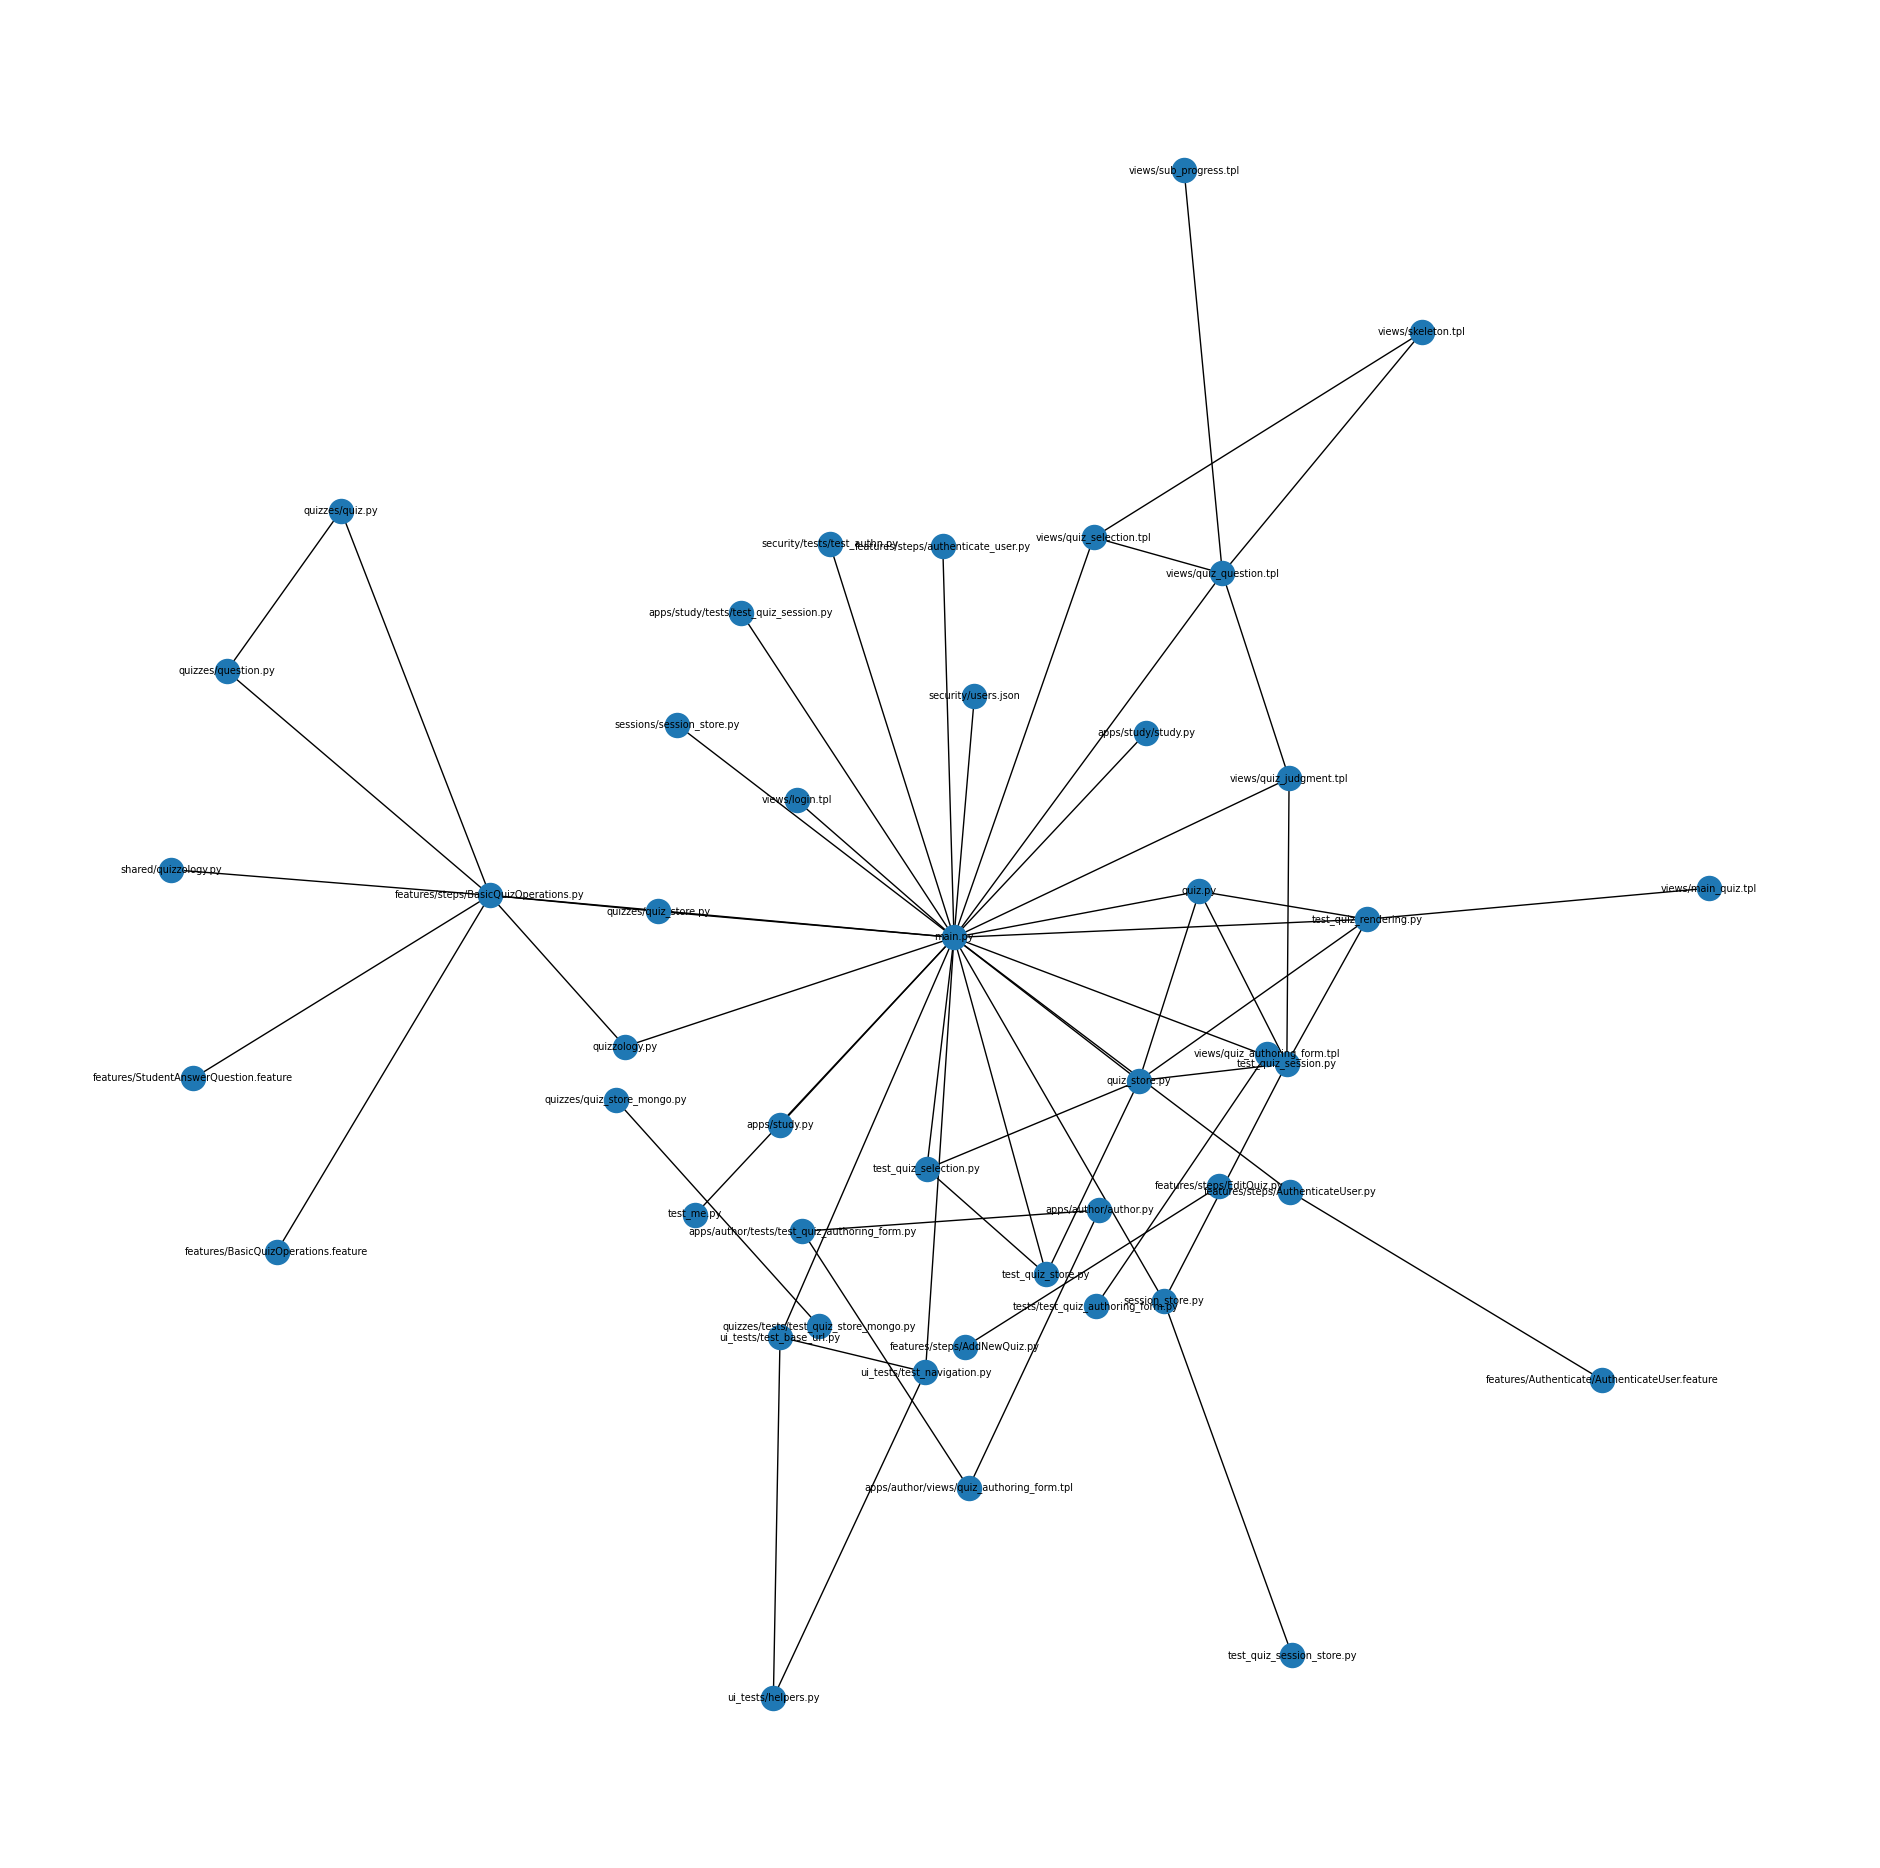

In [77]:
fig, ax = plot.subplots(figsize=(24,24))
nx.draw_kamada_kawai(busiest_graph, **medium_labels)

In [ ]:
#What if we remove the most heavily connected items instead of the least-heavily?


In [ ]:
from statistics import mean, stdev, variance, multimode
counters = [ x for (_,_,x) in commits ]

print(f'Largest commit is {max(counters)} files')
print(f'Average commit is {mean(counters)} files')
print(f'Standard Deviation is {stdev(counters)}')
print(f'Variance is {variance(counters)}')
print(f'Multimode is {multimode(counters)}')

In [ ]:
# Maybe a digraph is wise? 
repo = Repo("../quizzology")
repo_multigraph = nx.MultiGraph()
for commit in repo.iter_commits():
    for (left,right) in combinations(commit.stats.files,2):
        repo_multigraph.add_edge(left,right)

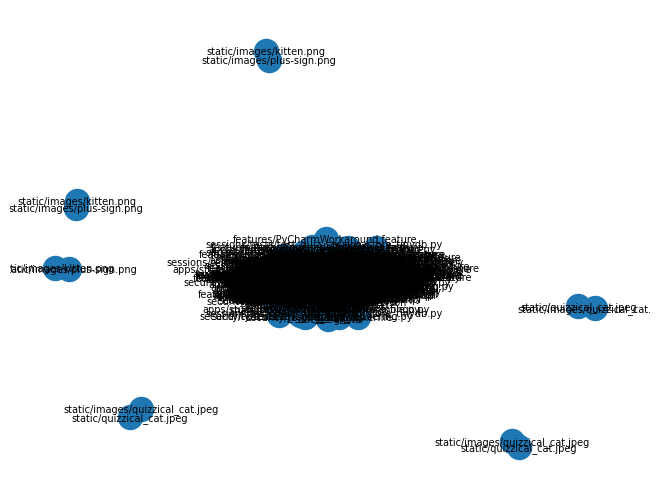

In [79]:
number = 122
for topic in nx.connected_components(repo_multigraph):
    number += 1
    nx.draw(repo_multigraph, **little_labels )

In [89]:
from datetime import datetime, timedelta
first_date = commits[0][1]
now = datetime.today().astimezone()
days = 400
print(f'Since {(now - timedelta(days=days)).isoformat()} ')
dataset = [count for (author,timestamp,count)
           in commits
           if (now - timestamp).days <= days  ]
print(f'commits: {len(dataset)}')
if dataset:
    print(f'Largest commit is {max(dataset)} files')
    print(f'Average commit is {mean(dataset)} files')
    print(f'Standard Deviation is {stdev(dataset)}')
    print(f'Variance is {variance(dataset)}')
    print(f'Multimode is {multimode(dataset)}')

Since 2022-03-02T18:37:06.936730-05:00 
commits: 208
Largest commit is 19 files
Average commit is 2.3173076923076925 files
Standard Deviation is 2.156954477925745
Variance is 4.652452619843924
Multimode is [1]
